In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geomdl import BSpline
from geomdl import BSpline
from geomdl import knotvector

In [9]:
control_points = np.zeros((6250,16,2))
control_points[:,7:9:,0] += 1. 

int_pts_x = np.linspace(start=.1, stop=.9, num=5)
int_pts_x_neg = np.flipud(int_pts_x)
for i in range(6250):

    int_pts_y = np.random.uniform(low=0.1, high=0.8, size=5)
    int_pts_y_neg = np.random.uniform(low=0.1, high=0.8, size=5) * -1.

    int_pts_pos = np.dstack((int_pts_x, int_pts_y)).squeeze()
    int_pts_neg = np.dstack((int_pts_x_neg, int_pts_y_neg)).squeeze()

    control_points[i,2:7,:] = int_pts_pos
    control_points[i,9:14,:] = int_pts_neg


In [88]:
print(control_points[0])

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.1         0.70179907]
 [ 0.3         0.20771141]
 [ 0.5         0.34792893]
 [ 0.7         0.58276238]
 [ 0.9         0.78934321]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.9        -0.10458916]
 [ 0.7        -0.58766741]
 [ 0.5        -0.14338105]
 [ 0.3        -0.56943567]
 [ 0.1        -0.46989484]
 [ 0.          0.        ]
 [ 0.          0.        ]]


<Figure size 432x288 with 0 Axes>

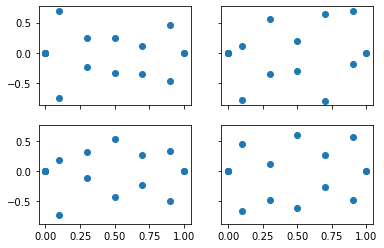

In [10]:
f = plt.figure()
f,axes = plt.subplots(2, 2, sharex=True, sharey=True)
sc = axes[0][0].scatter(control_points[0,:,0], control_points[0,:,1])
axes[0][1].scatter(control_points[1,:,0], control_points[1,:,1])
axes[1][0].scatter(control_points[2,:,0], control_points[2,:,1])
axes[1][1].scatter(control_points[3,:,0], control_points[3,:,1])
plt.show()

In [11]:
pc = np.empty((6250,1000,2))
normals = np.empty((6250,1000,3))

In [12]:
print(normals[0].shape)

(1000, 3)


In [13]:
from tqdm import tqdm
for i in tqdm(range(6250)):
    # Create the curve instance
    crv = BSpline.Curve()

    # Set degree
    crv.degree = 2

    # Set control points
    crv.ctrlpts = control_points[i].tolist()

    # Generate knot vector
    crv.knotvector = knotvector.generate(crv.degree, 16)

    # Set evaluation delta
    crv.delta = 0.001

    points = crv.evalpts

    pc[i] = np.asarray(points[:-1])
    # print(np.asarray(points).shape)

    temp = []
    for j in range(len(points)-1):
        x = crv.normal((j/len(points))+0.00001)
        temp.append(x[-1])
    normals[i] = - np.asarray(temp)

100%|██████████| 6250/6250 [05:05<00:00, 20.45it/s]


<Figure size 432x288 with 0 Axes>

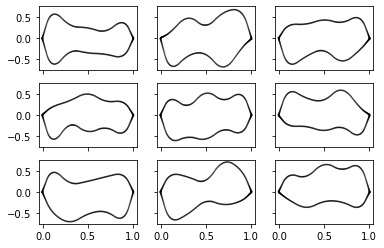

In [14]:
f = plt.figure()
f,axes = plt.subplots(3, 3, sharex=True, sharey=True)
sc = axes[0][0].quiver(pc[0,:,0], pc[0,:,1], normals[0,:,0], normals[0,:,1])
axes[0][1].quiver(pc[1,:,0], pc[1,:,1], normals[1,:,0], normals[1,:,1])
axes[1][0].quiver(pc[2,:,0], pc[2,:,1], normals[2,:,0], normals[2,:,1])
axes[1][1].quiver(pc[3,:,0], pc[3,:,1], normals[3,:,0], normals[3,:,1])
axes[2][0].quiver(pc[4,:,0], pc[4,:,1], normals[4,:,0], normals[4,:,1])
axes[2][1].quiver(pc[5,:,0], pc[5,:,1], normals[5,:,0], normals[5,:,1])
axes[2][2].quiver(pc[6,:,0], pc[6,:,1], normals[6,:,0], normals[6,:,1])
axes[0][2].quiver(pc[7,:,0], pc[7,:,1], normals[7,:,0], normals[7,:,1])
axes[1][2].quiver(pc[8,:,0], pc[8,:,1], normals[8,:,0], normals[8,:,1])
plt.show()

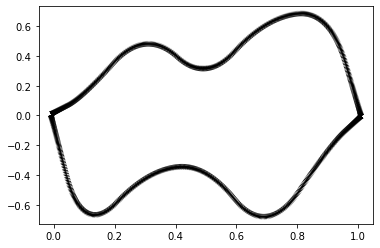

In [15]:
plt.quiver(pc[1,:,0], pc[1,:,1], normals[1,:,0], normals[1,:,1])

In [2]:
import os
datasets_path = '/data/EthanHerron/DiffNet/DiffNet/DiffNet/datasets/parametric/nurbs'
# np.savez_compressed(os.path.join(datasets_path, 'point_cloud.npz'),pc)
# np.savez_compressed(os.path.join(datasets_path, 'normals.npz'),normals)

In [3]:
pc = np.load(os.path.join(datasets_path, 'point_cloud.npz'))['arr_0']
normals = np.load(os.path.join(datasets_path, 'normals.npz'))['arr_0']

<Figure size 432x288 with 0 Axes>

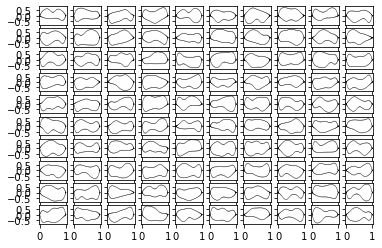

In [4]:
f = plt.figure()
f,axes = plt.subplots(10, 10, sharex=True, sharey=True)
# axes[0][0].quiver(pc[0,:,0], pc[0,:,1], normals[0,:,0], normals[0,:,1])
# axes[0][1].quiver(pc[1,:,0], pc[1,:,1], normals[1,:,0], normals[1,:,1])
# axes[1][0].quiver(pc[2,:,0], pc[2,:,1], normals[2,:,0], normals[2,:,1])
# axes[1][1].quiver(pc[3,:,0], pc[3,:,1], normals[3,:,0], normals[3,:,1])
# axes[2][0].quiver(pc[4,:,0], pc[4,:,1], normals[4,:,0], normals[4,:,1])
# axes[2][1].quiver(pc[5,:,0], pc[5,:,1], normals[5,:,0], normals[5,:,1])
# axes[2][2].quiver(pc[6,:,0], pc[6,:,1], normals[6,:,0], normals[6,:,1])
# axes[0][2].quiver(pc[7,:,0], pc[7,:,1], normals[7,:,0], normals[7,:,1])
# axes[1][2].quiver(pc[8,:,0], pc[8,:,1], normals[8,:,0], normals[8,:,1])
# axes[0][3].quiver(pc[9,:,0], pc[9,:,1], normals[9,:,0], normals[9,:,1])
# axes[1][3].quiver(pc[10,:,0], pc[10,:,1], normals[10,:,0], normals[10,:,1])
# axes[2][3].quiver(pc[11,:,0], pc[11,:,1], normals[11,:,0], normals[11,:,1])
index = 5000
for row in range(10):
    for column in range(10):
        axes[row][column].quiver(pc[index,:,0], pc[index,:,1], normals[index,:,0], normals[index,:,1])
        index += 1
plt.show()

In [6]:
points_translated = pc*0.5 + 0.5

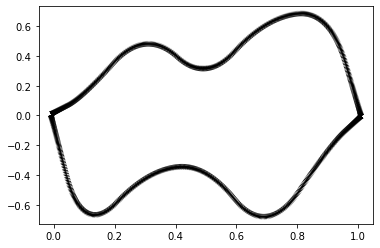

In [7]:
plt.quiver(pc[1,:,0], pc[1,:,1], normals[1,:,0], normals[1,:,1])

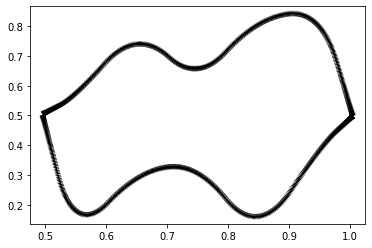

In [8]:
plt.quiver(points_translated[1,:,0], points_translated[1,:,1], normals[1,:,0], normals[1,:,1])

In [18]:
x_translation = np.random.uniform(low=0.4, high=0.6, size=(6250,1))
y_translation = np.random.uniform(low=0.0, high=0.5, size=(6250,1))
points = pc*0.5
points[:,:,0] += x_translation
points[:,:,1] += y_translation

<Figure size 432x288 with 0 Axes>

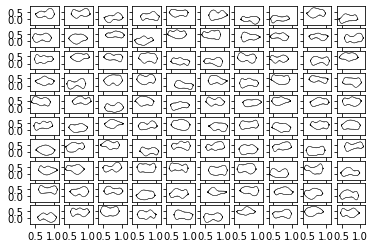

In [20]:
f = plt.figure()
f,axes = plt.subplots(10, 10, sharex=True, sharey=True)
index = 3000
for row in range(10):
    for column in range(10):
        axes[row][column].quiver(points[index,:,0], points[index,:,1], normals[index,:,0], normals[index,:,1])
        index += 1
plt.show()